<a href="https://colab.research.google.com/github/JupiterHJ/Korea_homeprice_group/blob/main/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EA%B7%B8%EB%A3%B9%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#한글폰트설치
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


['NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunGothic']

In [8]:
#라이브러리 불러오기
!git clone https://github.com/JupiterHJ/Korea_homeprice_group.git

fatal: destination path 'Korea_homeprice_group' already exists and is not an empty directory.


In [9]:
#데이터 읽어오기
import pandas as pd
df = pd.read_csv('/content/Korea_homeprice_group/평균매매가격.csv', encoding='UTF8', index_col=0)

#데이터 자료형 확인하기
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 종로구 to 서구
Columns: 127 entries, 2012년 01월 to 2022년 07월
dtypes: object(127)
memory usage: 73.0+ KB
None
2012년 01월    object
2012년 02월    object
2012년 03월    object
2012년 04월    object
2012년 05월    object
              ...  
2022년 03월    object
2022년 04월    object
2022년 05월    object
2022년 06월    object
2022년 07월    object
Length: 127, dtype: object


In [10]:
#float로 뜨게 자료형 데이터 변경
df = df.apply(pd.to_numeric, errors='coerce')
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 종로구 to 서구
Columns: 127 entries, 2012년 01월 to 2022년 07월
dtypes: float64(127)
memory usage: 73.0+ KB
None
2012년 01월    float64
2012년 02월    float64
2012년 03월    float64
2012년 04월    float64
2012년 05월    float64
              ...   
2022년 03월    float64
2022년 04월    float64
2022년 05월    float64
2022년 06월    float64
2022년 07월    float64
Length: 127, dtype: object


# **1. 주택가격 흐름이 비슷한 지역 찾기**

In [11]:
#1.지역입력하기
import numpy as np

name = input('원하는 지역 이름을 입력해주세요. (예: 구로구) : ')
a = df.index.str.contains(name)   #a = df.index.str.contains(name)
df2 = df[a]
df2

원하는 지역 이름을 입력해주세요. (예: 구로구) : 금천구


,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,2012년 10월,...,2021년 10월,2021년 11월,2021년 12월,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월
금천구,282328.0,283190.0,282241.0,281897.0,280690.0,280086.0,278879.0,275862.0,274172.0,274362.0,...,651938.0,654875.0,654588.0,654596.0,654286.0,653968.0,653751.0,653247.0,652860.0,651526.0


몇 개의 지역까지 나타내시겠습니까? (예:5) : 4


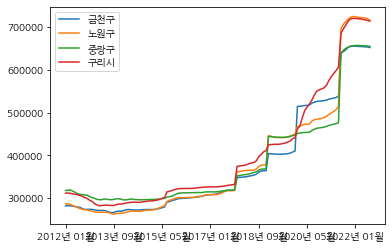

In [12]:
#2. 그래프로 시각화하기
import matplotlib.pyplot as plt

#빼고(sub) 제곱값(power)을 모두 더함(sum), sort_values(정렬)
i = input('몇 개의 지역까지 나타내시겠습니까? (예:5) : ')
plt.rc('font', family='NanumGothic')
df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[:int(i)]].T.plot()
plt.show()

# 2. 실거래가 확인하기
 - https://eslife.tistory.com/1100


# 3. 주택가격 싸이클이 비슷한 구간 찾기
